In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.funs import count_outliers
from utils.symmetry_scores import get_scores

from transformers import OpenAIGPTModel, GPT2Model, AutoModelForCausalLM

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = '../../../_data/fig-symmetry-language-models/GPT-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [5]:
path = ["h[", "].attn.c_attn.weight"]

'GPT 1 (l = 12, d = 768, h = 12 ; 110M parameters)'
dh = 64
l = 12
d = 768
h = d // dh

model = OpenAIGPTModel.from_pretrained("openai-gpt")
score_List= get_scores(d, l, h, dh, model, path, model_type = "GPT")
models['gpt1'] = [l, d, h, dh, score_List]

'GPT2 (l = 12, d = 768, h = 12 ; 117M parameters)'
dh = 64
l = 12
d = 768
h = d // dh

model = GPT2Model.from_pretrained('gpt2')
score_List= get_scores(d, l, h, dh, model, path, model_type = "GPT")
models['gpt2'] = [l, d, h, dh, score_List]

'GPT2 medium (l = 24, d = 1024, h = 16 ; 345M parameters)'
dh = 64
l = 24
d = 1024
h = d // dh

model = GPT2Model.from_pretrained('gpt2-medium')
score_List= get_scores(d, l, h, dh, model, path, model_type = "GPT")
models['gpt2-medium'] = [l, d, h, dh, score_List]

'GPT2 large (l = 36, d = 1280, h = 20 ; 774M parameters)'
dh = 64
l = 36
d = 1280
h = d // dh

model = GPT2Model.from_pretrained('gpt2-large')
score_List= get_scores(d, l, h, dh, model, path, model_type = "GPT")
models['gpt2-large'] = [l, d, h, dh, score_List]

'GPT2 xl (l = 48, d = 1600, h = 25 ; 1558M parameters)'
dh = 64
l = 48
d = 1600
h = d // dh

model = GPT2Model.from_pretrained('gpt2-xl')
score_List= get_scores(d, l, h, dh, model, path, model_type = "GPT")
models['gpt2-xl'] = [l, d, h, dh, score_List]

path = ["transformer.h[", "].attn.c_attn.weight"]

'DistillGPT2 base model (l = 6, d = 768, h = 12 ; tot num parameters 82M)'
dh = 64
l = 6
d = 768
h = d // dh

model = AutoModelForCausalLM.from_pretrained("distilbert/distilgpt2")
score_List= get_scores(d, l, h, dh, model, path, model_type = "GPT")
models['distill-gpt2'] = [l, d, h, dh, score_List]

In [6]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

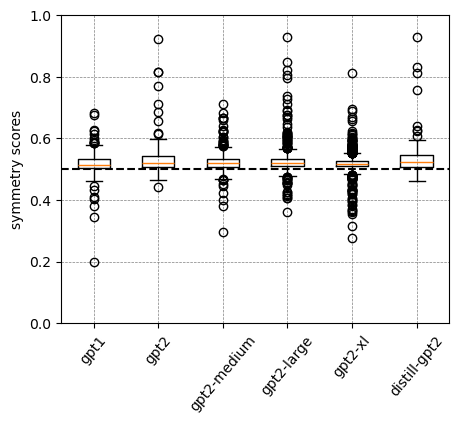

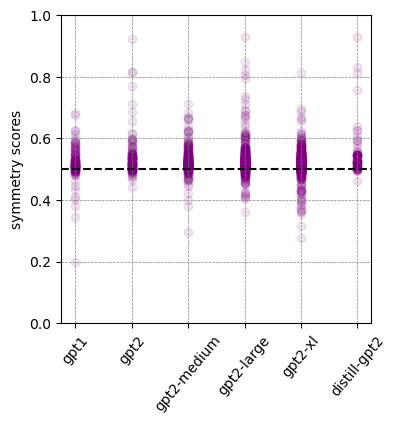

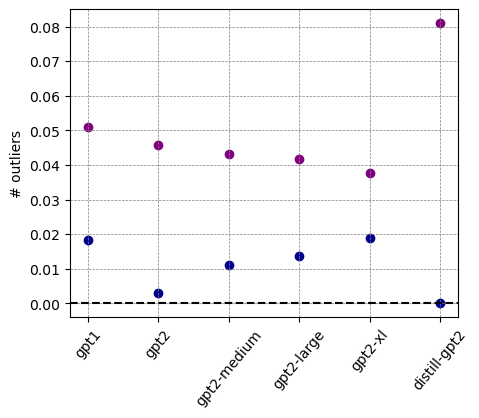

In [3]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)